In [2]:
#ライブラリをインポート
#標準ライブラリ
import statistics
import pathlib

#サードパーティー製
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

#自作モジュール

# 概要

各手法の精度をプロットする．<br>
その結果から、どの手法が一番良い精度かご提案する．

今回はデータとしては残していないので、目検で確認したものをプロットする．

# DataFrameを準備

In [3]:
list_train_accuray = [0.932, 0.882, 0.864, 
                      0.925, 0.806, 0.774,
                      1.000, 0.989, 0.665,
                      0.979, 0.940, 0.738,
                      0.770,
                      0.989, 0.982, 0.647, 0.848, 0.873]

list_val_accurcay = [0.769, 0.712, 0.739, 
                     0.734, 0.638, 0.678,
                     0.670, 0.700, 0.671,
                     0.751, 0.750, 0.763, 
                     0.768,
                     0.785, 0.762, 0.630, 0.793, 0.760]

index_name = ['Base', 'Dropout','GlobalAvgPool',
               'DepthwiseSeparableConv',
               'DepthwiseSeparableConv Dropout',
               'DepthwiseSeparableConvGlovalAvgPool',
               'PPM', 'PPM Dropout', 'PPM GlobalAvgPool',
               'SEModule', 'SEModule Dropout', 'SEModule GlobalAvgPool',
               'CBAM GlobalAvgPool',
               'GlobalAvgPool epoch200', 
              'DepthwiseSeparableConv epoch200',
              'PPM GlobalAvgPool', 'SEModule GlobalAvgPool epoch200',
              'CBAM GlobalAvgPool epoch200'
              ]

In [4]:
df_accuracy = pd.DataFrame([
    list_train_accuray, list_val_accurcay
]).T

df_accuracy.columns = ['Train Accuracy', 'Val Accuracy']
df_accuracy.index = index_name

In [5]:
df_accuracy

,Train Accuracy,Val Accuracy
Base,0.932,0.769
Dropout,0.882,0.712
GlobalAvgPool,0.864,0.739
DepthwiseSeparableConv,0.925,0.734
DepthwiseSeparableConv Dropout,0.806,0.638
DepthwiseSeparableConvGlovalAvgPool,0.774,0.678
PPM,1.000,0.670
PPM Dropout,0.989,0.700
PPM GlobalAvgPool,0.665,0.671
SEModule,0.979,0.751


# 散布図でプロット

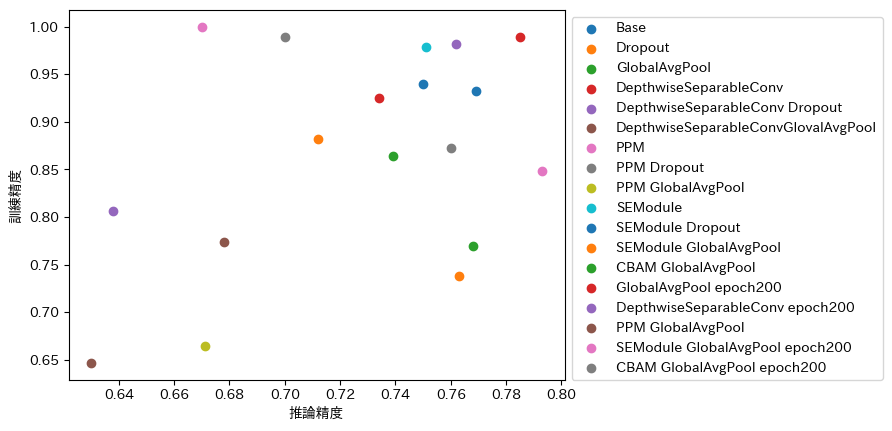

In [5]:
for i, (train_acc, val_acc) in enumerate(df_accuracy.values):
    plt.scatter(val_acc, train_acc, label = index_name[i])
plt.legend
plt.xlabel('推論精度')
plt.ylabel('訓練精度')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()

# 過学習

In [6]:
list_FC, list_Dropout, list_GAP = [], [], []
for name, (train_accuracy, val_accuracy) in zip(list(df_accuracy.index), list(df_accuracy.values)):
    if('GlobalAvgPool' in name):
        list_GAP.append({name : train_accuracy - val_accuracy})
    elif('Dropout' in name):
        list_Dropout.append({name : train_accuracy - val_accuracy})
    else:
        list_FC.append({name : train_accuracy - val_accuracy})

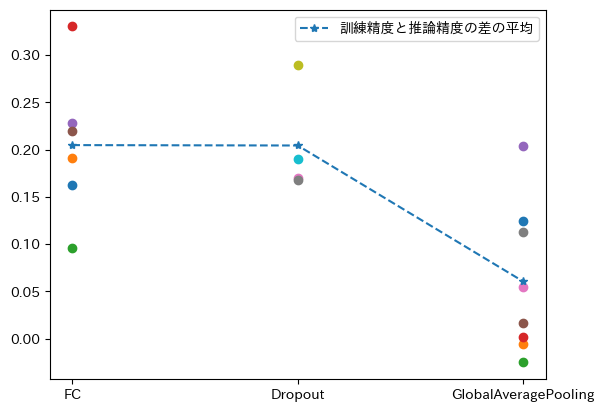

In [14]:
list_fc_mean = []
for dict_ in list_FC:
    label = str(list(dict_.keys())[0])
    value = float(list(dict_.values())[0])
    plt.scatter(x = 'FC', y = value)
    list_fc_mean.append(value)
mean_fc = statistics.mean(list_fc_mean)

list_drop_mean = []
for dict_ in list_Dropout:
    label = str(list(dict_.keys())[0])
    value = float(list(dict_.values())[0])
    plt.scatter(x = 'Dropout', y = value)
    list_drop_mean.append(value)
mean_drop = statistics.mean(list_drop_mean)

list_gap = []
for dict_ in list_GAP:
    label = str(list(dict_.keys())[0])
    value = float(list(dict_.values())[0])
    plt.scatter(x = 'GlobalAveragePooling', y = value)
    list_gap.append(value)
mean_gap = statistics.mean(list_gap)

plt.plot(['FC', 'Dropout', 'GlobalAveragePooling'], [mean_fc, mean_drop, mean_gap], marker = '*', ls = '--', label = '訓練精度と推論精度の差の平均')
plt.legend(loc = 'upper right')
plt.show()

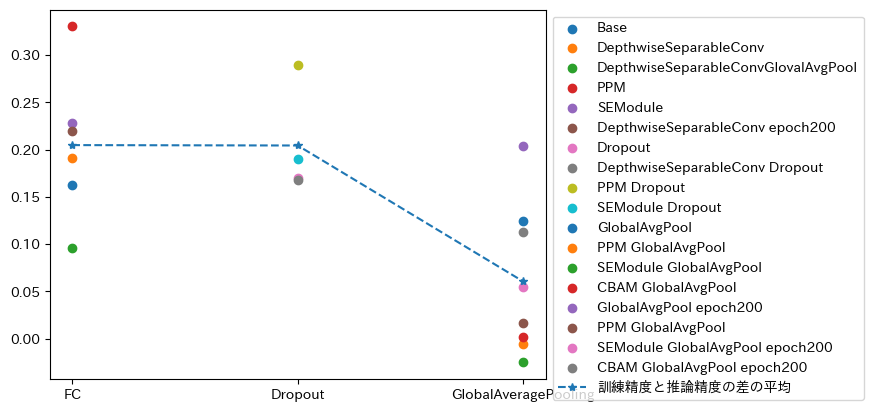

In [9]:
list_fc_mean = []
for dict_ in list_FC:
    label = str(list(dict_.keys())[0])
    value = float(list(dict_.values())[0])
    plt.scatter(x = 'FC', y = value, label = label)
    list_fc_mean.append(value)
mean_fc = statistics.mean(list_fc_mean)

list_drop_mean = []
for dict_ in list_Dropout:
    label = str(list(dict_.keys())[0])
    value = float(list(dict_.values())[0])
    plt.scatter(x = 'Dropout', y = value, label = label)
    list_drop_mean.append(value)
mean_drop = statistics.mean(list_drop_mean)

list_gap = []
for dict_ in list_GAP:
    label = str(list(dict_.keys())[0])
    value = float(list(dict_.values())[0])
    plt.scatter(x = 'GlobalAveragePooling', y = value, label = label)
    list_gap.append(value)
mean_gap = statistics.mean(list_gap)

plt.plot(['FC', 'Dropout', 'GlobalAveragePooling'], [mean_fc, mean_drop, mean_gap], marker = '*', ls = '--', label = '訓練精度と推論精度の差の平均')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()

# どのモジュールが良いか

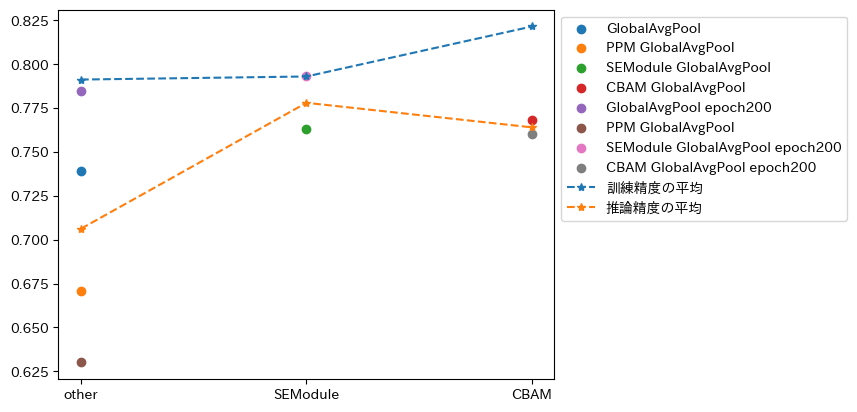

In [11]:
list_module, list_senet, list_cbam = [], [], []
list_module_train, list_senet_train, list_cbam_train = [], [], []
for name, (train_accuracy, val_accuracy) in zip(list(df_accuracy.index), list(df_accuracy.values)):
    if('GlobalAvgPool' in name):
        if('CBAM' in name):
            list_cbam.append(val_accuracy)
            list_cbam_train.append(train_accuracy)
            plt.scatter(x = 'CBAM', y = val_accuracy, label = name)
        elif('SEModule' in name):
            list_senet.append(val_accuracy)
            list_senet_train.append(train_accuracy)
            plt.scatter(x = 'SEModule', y = val_accuracy, label = name)
        else:
            list_module.append(val_accuracy)
            list_module_train.append(train_accuracy)
            plt.scatter(x = 'other', y = val_accuracy, label = name)

plt.plot(['other', 'SEModule', 'CBAM'], 
         [statistics.mean(list_module_train), statistics.mean(list_senet_train), statistics.mean(list_cbam_train)], 
         marker = "*", ls = '--', label = '訓練精度の平均')
plt.plot(['other', 'SEModule', 'CBAM'], 
         [statistics.mean(list_module), statistics.mean(list_senet), statistics.mean(list_cbam)], 
         marker = "*", ls = '--', label = '推論精度の平均')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()